<a href="https://colab.research.google.com/github/Brnvnrs/tallerDeGit/blob/main/MetNumVisualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib

![](https://miro.medium.com/v2/resize:fit:1400/1*OAFEIg9w1XHyZk0xBud14A.png)



## Matplotlib básico

Importamos matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

El comando básico es plot, permite generar curvas tipo funciones f(x,y) o scatter plots básicos

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html, ver los format strings

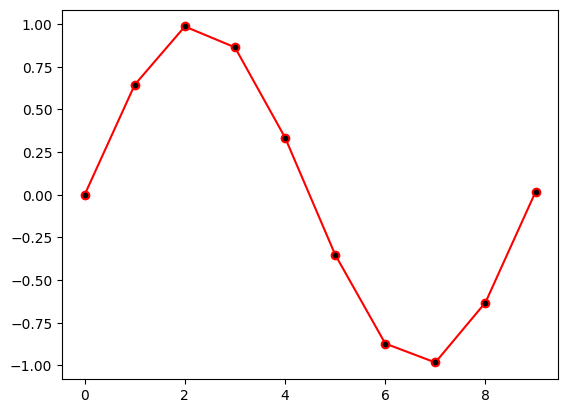

In [ ]:
x = np.arange(10)
y = np.sin(0.7*x)
plt.plot(x,y, '-ro');
plt.plot(x,y, '.k');
# con un format string como 3er argumento se puede setear el marker, color y tipo de linea;

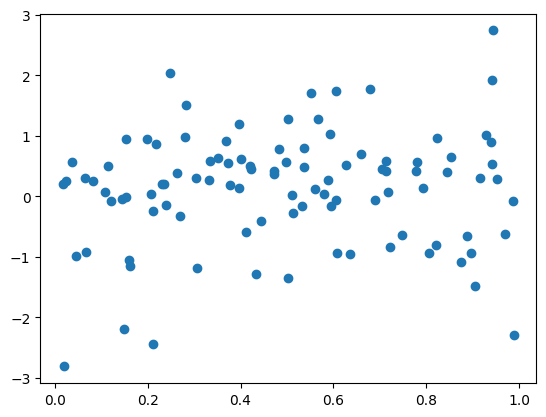

In [ ]:
x = np.random.rand(100)
y = np.random.randn(100)
plt.plot(x,y,'o')

**Ejercicio:** Reproduzca el siguiente gráfico (plt.plot)
hint: xlabel, ylabel, plt.legend

<img src='https://drive.google.com/uc?id=1mbkFW7ZTDAm0E8gH_68OMDcgAIyNzdPj'>


## Scatter

plt.scatter permite controlar el tamaño y color de cada punto por separado (plt.plot no puede).

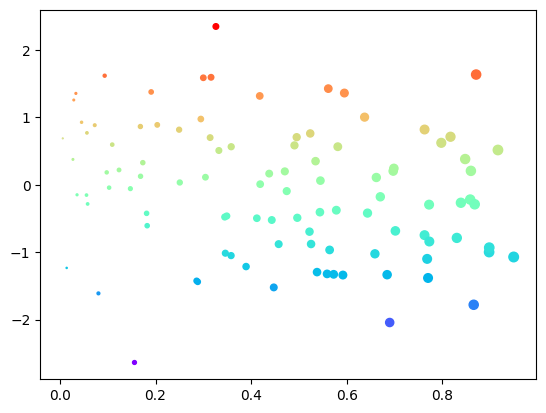

In [ ]:
x = np.random.rand(100)
y = np.random.randn(100)
s = x*50 # tamaño
c = y # color
plt.scatter(x,y,s,c,cmap=plt.cm.rainbow);

## Visulizar mapas de bits

plt.pcolor permite visualizar un arreglo 2D, los valores de cada elemento de mapean a un color y se genera una imagen tipo mapa de bits. Muy util para visualizar matrices

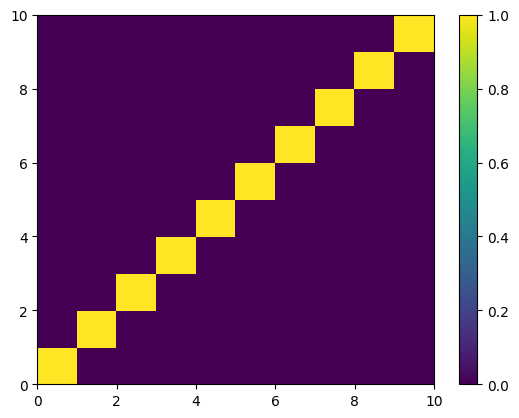

In [ ]:
plt.pcolor(np.eye(10)); #matriz diagonal
plt.colorbar(); # importante siempre incluir una escala con el mapa de colores

## Histogramas

Contar y visualizar ocurrencias de un grupo de elementos.

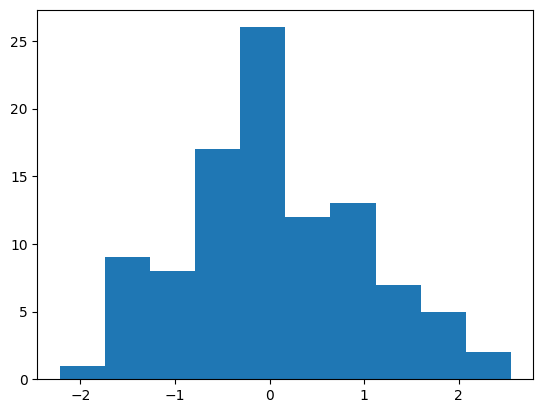

In [ ]:
x = np.random.randn(100)
plt.hist(x);

Se puede controlar el "bineado" utilizando un arreglo determinando el rango y la cantidad de "bines"

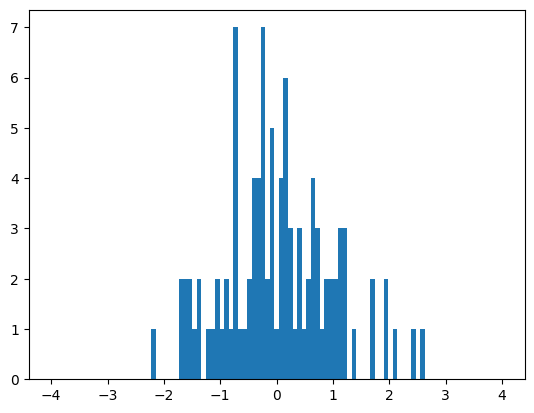

In [ ]:
plt.hist(x,bins=np.linspace(-4,4,100));

Usemos un histograma para visualizar los tiempos que tarda una ejecución. Podemos realizar 5000 medidas del promedio de 10 corridas con timeit

In [ ]:
times = %timeit -q -r 5000 -n 10 -o np.sum(np.random.randn(100))

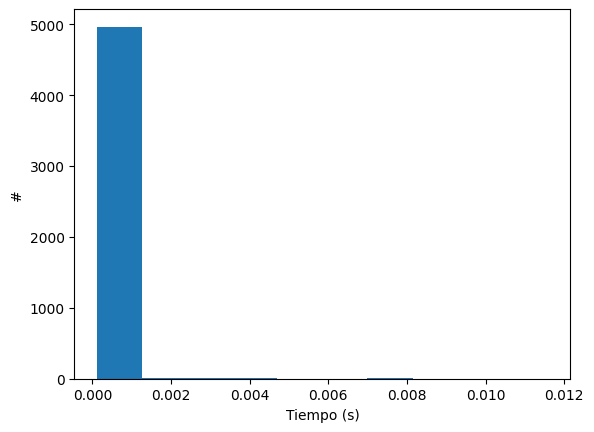

In [ ]:
plt.hist(times.all_runs);
plt.ylabel('#')
plt.xlabel('Tiempo (s)');

Lo mejoramos usando escala logarítmica tanto en los bines como en el conteo (modificar el mínimo bin y el máximo si el gráfico no se ve completo

Mejor 1.1437000000569242e-05 segundos


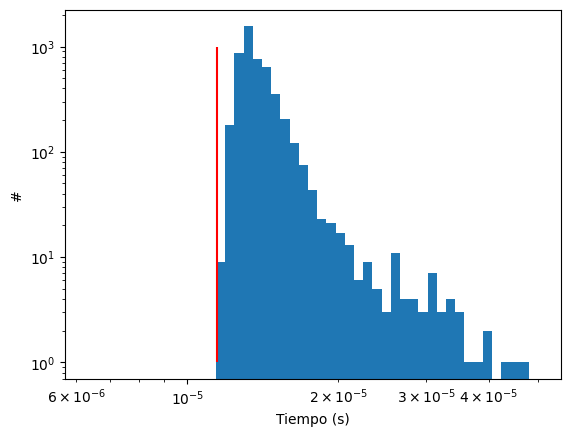

In [ ]:
plt.hist(times.timings,bins=np.logspace(-5.2,-4.3,50));
plt.ylabel('#')
plt.xlabel('Tiempo (s)');
plt.xscale('log')
plt.yscale('log')
plt.vlines(times.best,1,1000, color='r')
print('Mejor', times.best, 'segundos')

**Observación:** La distribución tiene un mínimo, este aproxima el mejor tiempo que puede entregar el sistema para evaluar la rutina. Si la rutina es no determinista o muy larga la forma de la distribución posiblemente cambie y se parezca más a una normal

Otra opción para visualizar distribuciones son los gráficos de boxplot. Estos representan una distribución a partir de la mediana (50% de los datos, linea naranja), una caja con los cuartiles Q1 (25% de los datos) y Q3 (75% de los datos), y unos "bigotes" con el rango mínimo máximos de los datos. Algunos datos se toman como outliers si superan cierto rango (círculos).

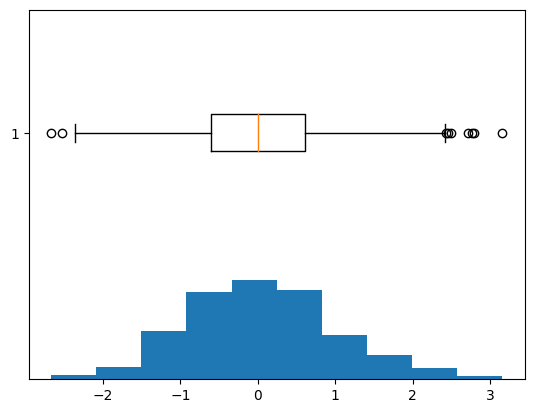

In [ ]:
x = np.random.randn(500)
plt.hist(x, density=True)
plt.boxplot(x,positions=[1],vert=False);

## Ejercicios

### Ejercicio 1

La ley de los grande números dice que a medida que se toma una muestra ($X_1,X_2,X_3,...$) con cada vez más elementos de números aleatorios identicamente distribuidos e independientes entre si, que siguen una distribución con valor esperado $\mu$, la media muestral ${\displaystyle \overline {X} ={\frac {1}{n}}\sum _{i=1}^{n}X_{i}}$ tiende a $\mu$ para $n\to∞$

Como ejemplo, se suele generar el siguiente gráfico, por ejemplo para un distribución uniforme [0,1), donde se ve que hay una tendencia a acercarse al valor esperado 0.5.

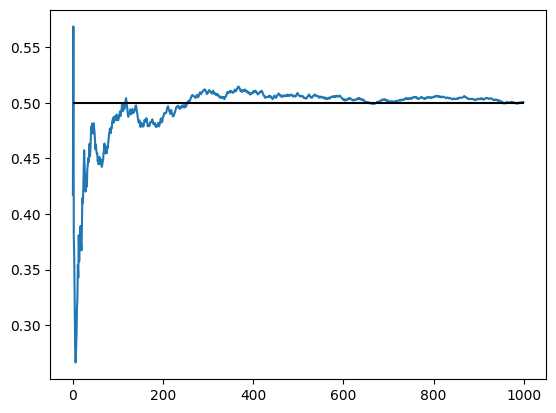

In [ ]:
N = 1000
np.random.seed(1)
x = np.random.rand(N)
sumas = np.cumsum(x)
cociente = np.arange(1,N+1)
medias = sumas/cociente
plt.plot(medias);
plt.hlines(0.5,0,N, color='black');

Lo que se desprende de este fenómeno, es que al tener muestras pequeñas, la incerteza que acarrea el valor medio también es más grande. Para visualizar mejor esto, queremos repetir el mismo experimento pero muchas veces (repeticiones) y observar la distribución con un boxplot para varios valores de tamaño de muestra como en el siguiente gráfico.


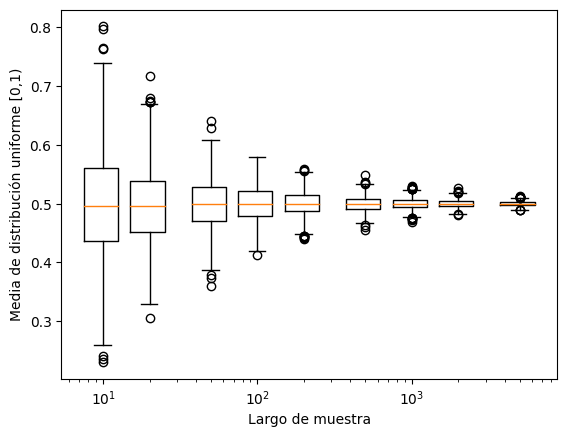

### Ejercicio 2

Revisitamos: Error numérico en sumas de elementos en un arreglo. Tenemos 5 algoritmos, suma puro python, suma ordenada, suma ordenada en reversa, suma kahan, suma numpy.

Queremos generar dos visualizaciones;
1. El tiempo que tardan los algorítmos en función del largo de la lista
2. El error que generan los algoritmos en función del largo de la lista

Utilizaremos una lista con números de una serie geométrica, que podemos saber cuanto suma.

Recrear estas figuras, utilizando las funciones que se encuentran más abajo

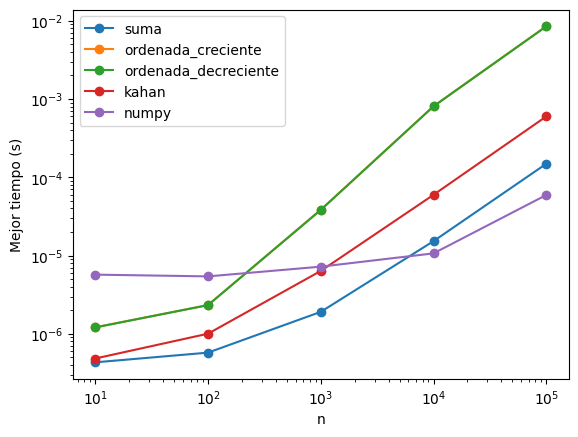

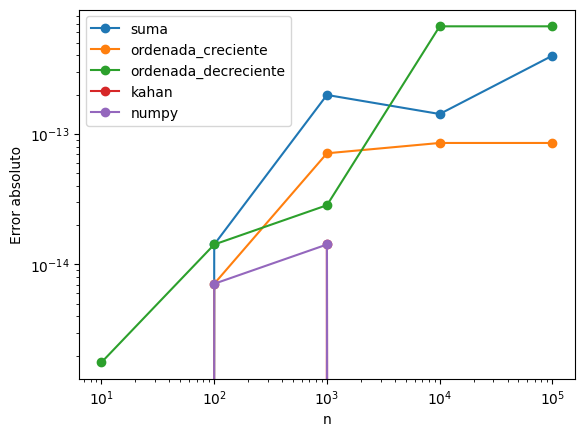

In [ ]:
from numba import jit

@jit
def suma(lista):
    suma = 0.0
    for x in lista:
        suma = suma + x
    return suma

@jit
def suma_ordenada(lista):
    lista = np.sort(lista)
    suma = 0.0
    for x in lista:
        suma = suma + x
    return suma

@jit
def suma_ordenada_decreciente(lista):
    lista = np.sort(lista)[::-1]
    suma = 0.0
    for x in lista:
        suma = suma + x
    return suma

@jit
def suma_kahan(lista):
    suma = 0.0
    c = 0.0
    for x in lista:
        y = x - c
        t = suma + y
        c = (t - suma) - y
        suma = t
    return suma

def suma_numpy(lista):
    return np.sum(lista)

In [ ]:
def serie_geometrica_desordenada(n,r, seed=1):
    np.random.seed(seed)
    return np.random.permutation(r**np.arange(n))

def suma_serie_geométrica(n,r):
    return (1 - r**n)/(1-r)

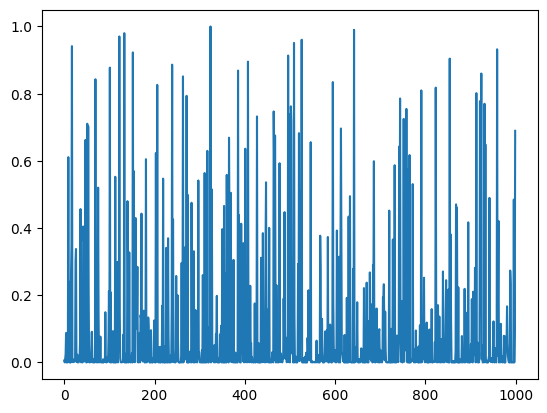

In [ ]:
n = 1000
r = 0.99
lista = serie_geometrica_desordenada(n,r)
plt.plot(lista);

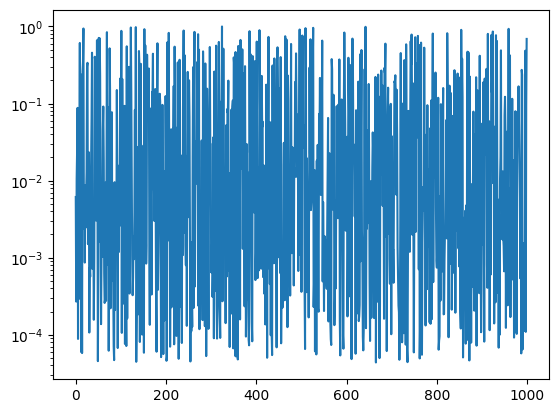

In [ ]:
plt.semilogy(lista) # eje y en logaritmo;

In [ ]:
suma_serie_geométrica(n,r), suma(lista), suma_ordenada(lista), suma_ordenada_decreciente(lista), suma_kahan(lista), suma_numpy(lista)

(99.99568287525884,
 99.99568287525864,
 99.99568287525877,
 99.99568287525881,
 99.99568287525885,
 99.99568287525885)

### Ejercicios 3

Caminatas al azar y difusion. Una forma sencilla de generar una caminata al azar es generando primero los pasos aleatorios y luego hacer la suma acumulada (np.cumsum). En la primer figura vemos muchas trayectorias para diferentes muestras de pasos aleatorios. Nos interesa poder generar histogramas para cada cantidad de pasos y observar la difusion en forma de mapa de bits. Replicar la segunda figura usando np.apply_along_axis, np.histogram y plt.pcolor.

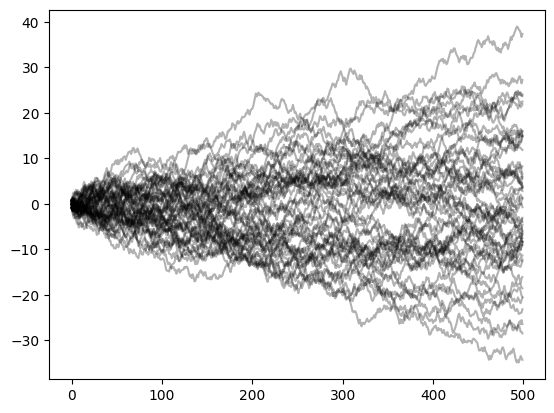

In [ ]:
Y = (np.random.rand(500,50))*2-1
X = np.cumsum(Y,axis=0)
plt.plot(X,'k',alpha=0.3);

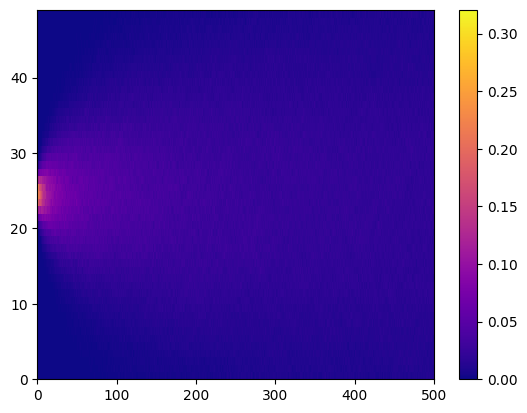